In [1]:
local_path = './'

"""## Prepare fastai"""
from fastai import *
from fastai.text import *
from fastai.metrics import *
from fastai.callbacks.tensorboard import LearnerTensorboardWriter
from fastai.callbacks.misc import StopAfterNBatches
import datetime
from pytz import timezone

torch.cuda.set_device(0)

"""## Prepare Dataset"""
local_project_path = local_path + 'bp_deepred/'
if not os.path.exists(local_project_path):
    os.makedirs(local_project_path)
print('local_project_path:', local_project_path)

"""## Create Language Model"""
class dna_tokenizer(BaseTokenizer):
    def tokenizer(self, t):
        res = []
        tokens = t.split(' ')
        if len(tokens) == 3:
            bos = tokens[0]
            text = tokens[1]
            eos = tokens[2]
            res = list(text)
            res.insert(0, bos)
            res.append(eos)
        else:
            res = list(tokens)
        return res
tokenizer = Tokenizer(tok_func=dna_tokenizer, pre_rules=[], post_rules=[], special_cases=[])

local_project_path: ./bp_deepred/


In [2]:
# batch size
bs = 256
data_lm = TextLMDataBunch.from_csv(local_project_path, 'combined.csv',
                                   text_cols ='seq', valid_pct= 0.1, tokenizer=tokenizer,
                                   include_bos= True, include_eos=True, bs=bs)
print('data_cls Training set size', len(data_lm.train_ds))
print('data_cls Validation set size', len(data_lm.valid_ds))

data_cls Training set size 129303
data_cls Validation set size 14368


In [5]:
len(data_lm.train_ds.x[10400].data)

72

In [ ]:
#data_lm.show_batch()

In [6]:
len(data_lm.vocab.itos)

40

In [7]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.05, pretrained=False, metrics =[accuracy]).to_fp16()

In [14]:
learn_lm.data = data_lm

In [11]:
learn_lm.data.batch_size = 256

In [13]:
def add_tensorboard_callback(learn_lm):
    now = datetime.datetime.now().astimezone(timezone('US/Eastern'))
    time_for_different_run = f'{now.year}-{now.month}-{now.day}-{now.hour}-{now.minute}-{now.second}'

    proj_id = 'cafa' + time_for_different_run
    tboard_path = Path('log/' + proj_id)
    remove_tensorboard_callback(learn_lm)
    learn_lm.callback_fns.append(partial(LearnerTensorboardWriter, base_dir=tboard_path, name='CafaLearner'))

def remove_tensorboard_callback(learn_lm):
    if len(learn_lm.callback_fns) > 1: # not the best way to check this !!
        learn_lm.callback_fns.pop()


In [13]:
add_tensorboard_callback(learn_lm)

In [15]:
remove_tensorboard_callback(learn_lm)
learn_lm.lr_find()
add_tensorboard_callback(learn_lm)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.20E-05
Min loss divided by 10: 1.45E-06


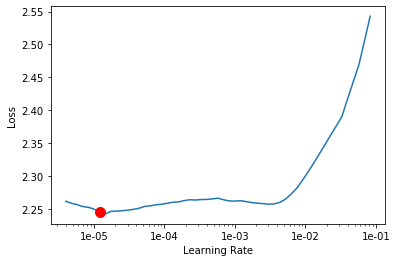

In [16]:
learn_lm.recorder.plot(skip_start=20, skip_end=20, suggestion = True)

In [ ]:
learn_lm.recorder.plot_losses()

In [ ]:
learn_lm.recorder.plot_lr(show_moms=True)

In [ ]:
learn_lm.recorder.plot_metrics()

In [27]:
learn_lm.fit_one_cycle(1, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.708568,2.702656,0.165962,18:49


In [47]:
learn_lm.unfreeze()

In [37]:
learn_lm.save('lm2-v2-loss2.57')

In [10]:
learn_lm.validate(metrics=[accuracy])

[2.004098, tensor(0.3861)]

In [ ]:
learn_lm.summary()

In [ ]:
learn_lm.model

In [33]:
learn_lm.fit_one_cycle(3, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.675824,2.681247,0.173536,18:40
1,2.600143,2.606814,0.196926,18:53
2,2.554635,2.570283,0.208333,18:42


In [48]:
learn_lm.fit_one_cycle(1, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.527830,2.542972,0.217295,18:43


In [49]:
learn_lm.fit_one_cycle(3, slice(1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.535802,2.561162,0.212092,18:53
1,2.489463,2.493320,0.233346,18:53
2,2.423061,2.452071,0.246441,18:54


In [57]:
learn_lm.save('lm2-v2-loss2.36')

In [56]:
learn_lm.fit_one_cycle(1, slice(2e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.366043,2.409769,0.260103,18:51


In [ ]:
learn_lm.fit_one_cycle(3, slice(1e-3), moms=(0.8,0.7))

In [65]:
learn_lm.save('lm2-v2-1')

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn_lm.save('lm2-v2-2')

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [ ]:
learn_lm.load('lm2-v2-3');

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-4')

In [ ]:
learn_lm.fit_one_cycle(10, slice(5e-4), moms=(0.8,0.7))

In [16]:
learn_lm.load('lm2-v2-13');

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [ ]:
learn_lm.save('lm2-v2-6')

In [ ]:
learn_lm.fit_one_cycle(10, slice(1e-3), moms=(0.8,0.7))

In [8]:
learn_lm.load('lm2-v2-21');